#**Mengakses API covid19.go.id Provinsi Daerah Istimewa Yogyakarta**

In [1]:
import requests
resp_diy = requests.get('https://data.covid19.go.id/public/api/prov_detail_DAERAH_ISTIMEWA_YOGYAKARTA.json')
cov_diy_raw = resp_diy.json()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Memahami Kasus COVID-19 di Daerah Istimewa Yogyakarta

In [3]:
print('Nama-nama elemen utama:\n', cov_diy_raw.keys())
print('\nJumlah total kasus COVID-19 di Daerah Istimewa Yogyakarta : %d' %cov_diy_raw['kasus_total'])
print('Persentase kematian akibat COVID-19 di Daerah Istimewa Yogyakarta : %f.2%%' %cov_diy_raw['meninggal_persen'])
print('Persentase tingkat kesembuhan dari COVID-19 di Daerah Istimewa Yogyakarta : %f.2%%' %cov_diy_raw['sembuh_persen'])

Nama-nama elemen utama:
 dict_keys(['last_date', 'provinsi', 'kasus_total', 'kasus_tanpa_tgl', 'kasus_dengan_tgl', 'meninggal_persen', 'meninggal_tanpa_tgl', 'meninggal_dengan_tgl', 'sembuh_persen', 'sembuh_tanpa_tgl', 'sembuh_dengan_tgl', 'list_perkembangan', 'data'])

Jumlah total kasus COVID-19 di Daerah Istimewa Yogyakarta : 149918
Persentase kematian akibat COVID-19 di Daerah Istimewa Yogyakarta : 3.250444.2%
Persentase tingkat kesembuhan dari COVID-19 di Daerah Istimewa Yogyakarta : 89.252792.2%


Memperoleh Informasi yang Lebih Lengkap

In [4]:
cov_diy = pd.DataFrame(cov_diy_raw['list_perkembangan'])
print('Info cov_diy:\n', cov_diy.info())
print('\nLima data teratas cov_diy:\n', cov_diy.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       534 non-null    int64
 1   KASUS                         534 non-null    int64
 2   MENINGGAL                     534 non-null    int64
 3   SEMBUH                        534 non-null    int64
 4   DIRAWAT_OR_ISOLASI            534 non-null    int64
 5   AKUMULASI_KASUS               534 non-null    int64
 6   AKUMULASI_SEMBUH              534 non-null    int64
 7   AKUMULASI_MENINGGAL           534 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  534 non-null    int64
dtypes: int64(9)
memory usage: 37.7 KB
Info cov_diy:
 None

Lima data teratas cov_diy:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1584316800000      1  ...                    0                             1
1  1584403200000     

Membersihkan Data

In [5]:
cov_diy_tidy = (cov_diy.drop(columns=[item for item in cov_diy.columns
																if item.startswith('AKUMULASI')
																or item.startswith('DIRAWAT')])
												.rename(columns=str.lower)
												.rename(columns={'kasus': 'kasus_baru'}))
cov_diy_tidy['tanggal'] = pd.to_datetime(cov_diy_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_diy_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  meninggal  sembuh
0 2020-03-16           1          0       0
1 2020-03-17           0          0       0
2 2020-03-18           0          0       0
3 2020-03-19           0          0       0
4 2020-03-20           0          0       1


Menunjukkan Melalui Gambar


<Figure size 432x288 with 0 Axes>

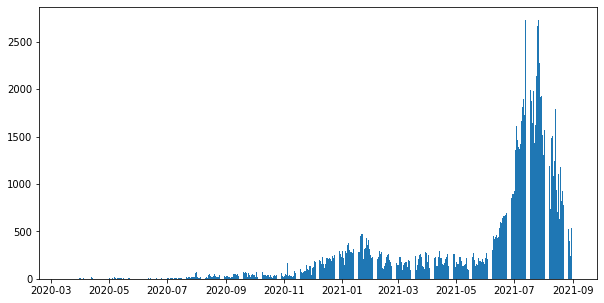

In [6]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_diy_tidy, x='tanggal', height='kasus_baru')
plt.show()

Informasi pada Grafik

<Figure size 432x288 with 0 Axes>

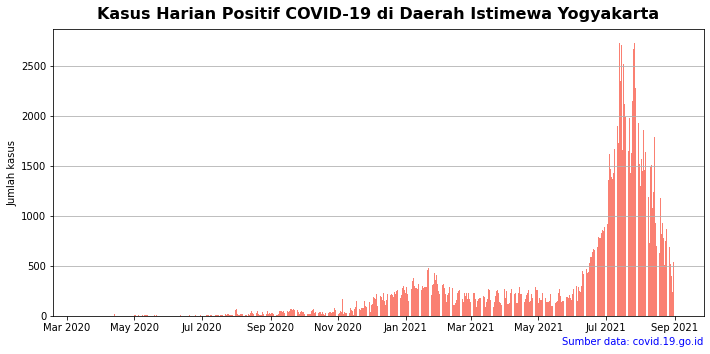

In [7]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_diy_tidy, x='tanggal', height='kasus_baru', color='salmon')
plt.title('Kasus Harian Positif COVID-19 di Daerah Istimewa Yogyakarta',
y=1.00, fontsize=16, pad=10, fontweight='bold', loc='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
		ha='right', transform=ax.transAxes)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Grafik Kasus Sembuh

<Figure size 432x288 with 0 Axes>

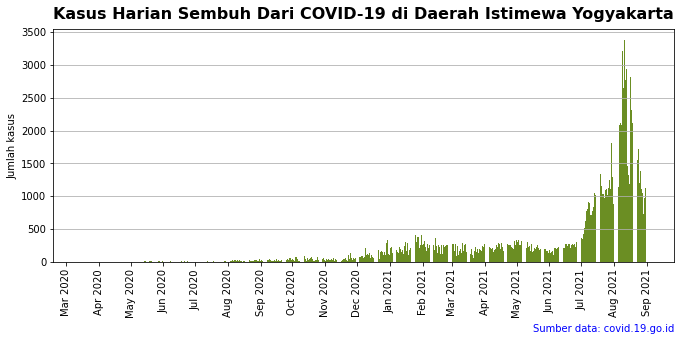

In [9]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_diy_tidy, x='tanggal', height='sembuh', color='olivedrab')
plt.title('Kasus Harian Sembuh Dari COVID-19 di Daerah Istimewa Yogyakarta',
             fontsize=16, pad=10, fontweight='bold', loc='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
 
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Grafik Kasus Meninggal

<Figure size 432x288 with 0 Axes>

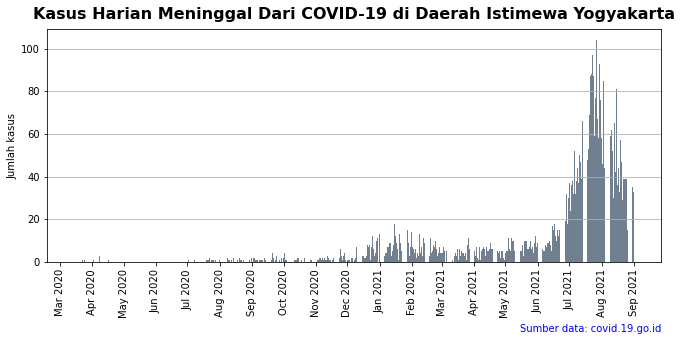

In [10]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_diy_tidy, x='tanggal', height='meninggal', color='slategrey')
plt.title('Kasus Harian Meninggal Dari COVID-19 di Daerah Istimewa Yogyakarta',
             fontsize=16, pad=10, fontweight='bold', loc='center')
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.3, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Perkembangan Kasus Pekan ini

In [11]:
cov_diy_pekanan = (cov_diy_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_diy_pekanan['tahun'] = cov_diy_pekanan['tanggal'].apply(lambda x: x.year)
cov_diy_pekanan['pekan_ke'] = cov_diy_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_diy_pekanan = cov_diy_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_diy_pekanan:')
print(cov_diy_pekanan.info())
print('\nLima data teratas cov_diy_pekanan:\n', cov_diy_pekanan.head())

Info cov_diy_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     77 non-null     int64
 1   pekan_ke  77 non-null     int64
 2   jumlah    77 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB
None

Lima data teratas cov_diy_pekanan:
    tahun  pekan_ke  jumlah
0   2020        12       1
1   2020        13       1
2   2020        14      17
3   2020        15       6
4   2020        16      27


In [12]:
cov_diy_pekanan['jumlah_pekanlalu'] = cov_diy_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_diy_pekanan['lebih_baik'] = cov_diy_pekanan['jumlah'] < cov_diy_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_diy_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        12       1                 0       False
1   2020        13       1                 1       False
2   2020        14      17                 1       False
3   2020        15       6                17        True
4   2020        16      27                 6       False
5   2020        17      15                27        True
6   2020        18      33                15       False
7   2020        19      38                33       False
8   2020        20      46                38       False
9   2020        21      27                46        True


Bar Chart

<Figure size 432x288 with 0 Axes>

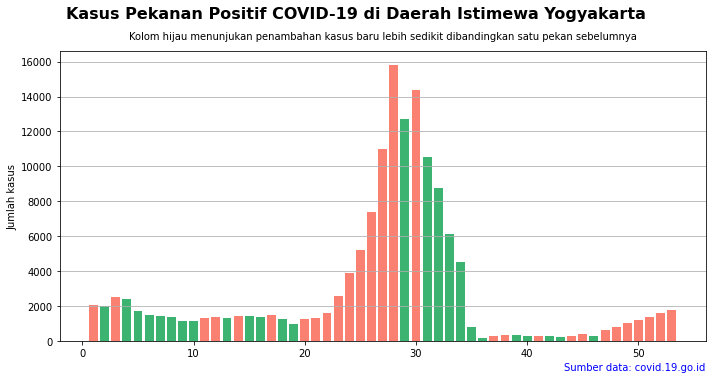

In [13]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_diy_pekanan, x='pekan_ke', height='jumlah',
color=['mediumseagreen' if x is True else 'salmon' for x in cov_diy_pekanan['lebih_baik']])

fig.suptitle('Kasus Pekanan Positif COVID-19 di Daerah Istimewa Yogyakarta',
            y=1.04, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
            y=1.02, fontsize=10)

ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
ha='right', transform=ax.transAxes)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

Pola dan Dinamika

In [14]:
cov_diy_akumulasi = cov_diy_tidy[['tanggal']].copy()
cov_diy_akumulasi['akumulasi_aktif'] = (cov_diy_tidy['kasus_baru'] - cov_diy_tidy['sembuh'] - cov_diy_tidy['meninggal']).cumsum()
cov_diy_akumulasi['akumulasi_sembuh'] = cov_diy_tidy['sembuh'].cumsum()
cov_diy_akumulasi['akumulasi_meninggal'] = cov_diy_tidy['meninggal'].cumsum()
cov_diy_akumulasi.tail()

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
529,2021-08-27,14593,128886,4725
530,2021-08-28,14033,129940,4756
531,2021-08-29,13672,130677,4778
532,2021-08-30,12902,131649,4813
533,2021-08-31,12281,132776,4846


Line Chart

<Figure size 432x288 with 0 Axes>

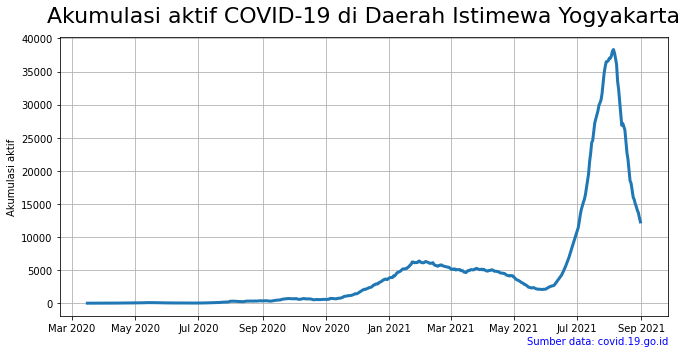

In [15]:
plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_diy_akumulasi, lw=3)

ax.set_title('Akumulasi aktif COVID-19 di Daerah Istimewa Yogyakarta',
            y=1.03, fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes) 

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

Dinamika Kasus COVID-19 di Daerah Istimewa Yogyakarta

<Figure size 432x288 with 0 Axes>

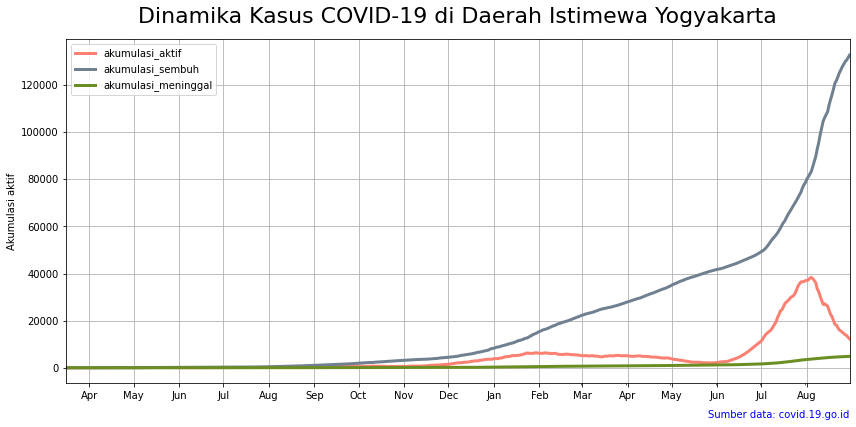

In [16]:
plt.clf()
fig, ax = plt.subplots(figsize=(12,6))
cov_diy_akumulasi.plot(x='tanggal', kind='line', ax=ax, lw=3,
color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Daerah Istimewa Yogyakarta',
            y=1.03, fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()